In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import random

In [2]:
tpath = r'cool_tests'
path = r'Final_cooling_sys_data'
f1 = pd.read_csv(path + '\\final_cooling_dset_31.csv')    #8 datasets for introducing faults into them
f2 = pd.read_csv(path + '\\final_cooling_dset_32.csv')
f3 = pd.read_csv(path + '\\final_cooling_dset_33.csv')
f4 = pd.read_csv(path + '\\final_cooling_dset_34.csv')
f5 = pd.read_csv(path + '\\final_cooling_dset_35.csv')
f6 = pd.read_csv(path + '\\final_cooling_dset_36.csv')
f7 = pd.read_csv(path + '\\final_cooling_dset_37.csv')
f8 = pd.read_csv(path + '\\final_cooling_dset_38.csv')
og = pd.read_csv(r'cooling_system.csv')

In [3]:
og

,Unnamed: 0,64817-1598,65263-111,65262-110
0,2,4096.0,50.0,88.0
1,3,4096.0,50.0,89.0
2,4,4096.0,50.0,89.0
3,5,4096.0,50.0,87.0
4,6,4096.0,50.0,87.0
...,...,...,...,...
92555,92557,4096.0,50.0,62.0
92556,92558,4096.0,50.0,62.0
92557,92559,4096.0,50.0,62.0
92558,92560,4096.0,50.0,62.0


Making sure that the synthetic data meets the data ranges.

In [4]:
f1

,Unnamed: 0,65262-110,65263-111,64817-1598
0,0,89.549225,49.994987,4095.2751
1,1,89.549576,49.994980,4095.2725
2,2,89.549576,49.994980,4095.2722
3,3,89.549576,49.994980,4095.2722
4,4,89.549576,49.994980,4095.2722
...,...,...,...,...
92539,92539,89.473540,49.999947,4095.9478
92540,92540,89.473540,49.999947,4095.9478
92541,92541,89.473540,49.999947,4095.9478
92542,92542,89.473540,49.999947,4095.9478


In [5]:
dsets = [f1, f2, f3, f4, f5, f6, f7, f8]

In [6]:
for i in range(len(dsets)):
    dsets[i].drop(['Unnamed: 0'], axis=1, inplace=True)
    dsets[i]['65263-111'] = dsets[i]['65263-111'].mode()[0].astype(int)
    dsets[i].loc[dsets[i]['64817-1598'] != 0, '64817-1598'] = 4096

In [7]:
dsets[0]

,65262-110,65263-111,64817-1598
0,89.549225,50,4096.0
1,89.549576,50,4096.0
2,89.549576,50,4096.0
3,89.549576,50,4096.0
4,89.549576,50,4096.0
...,...,...,...
92539,89.473540,50,4096.0
92540,89.473540,50,4096.0
92541,89.473540,50,4096.0
92542,89.473540,50,4096.0


Plotting some graphs to compare the synthetic data to the Original data

In [8]:
#Function to plot moving average graph
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

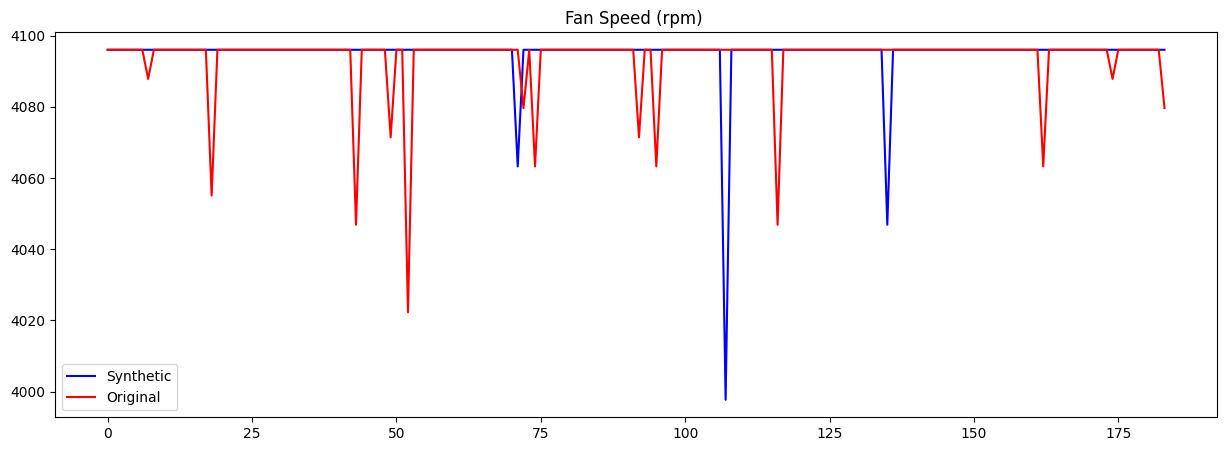

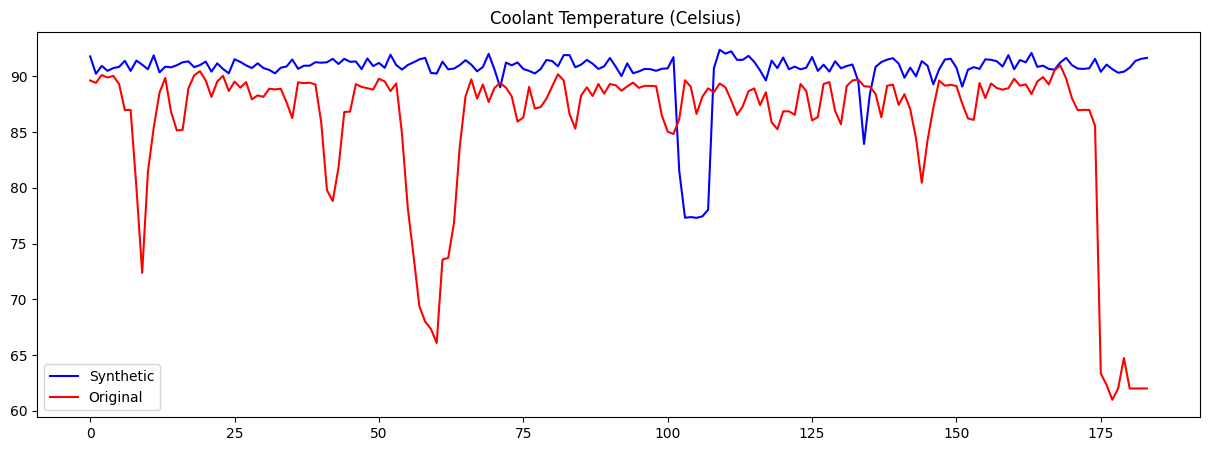

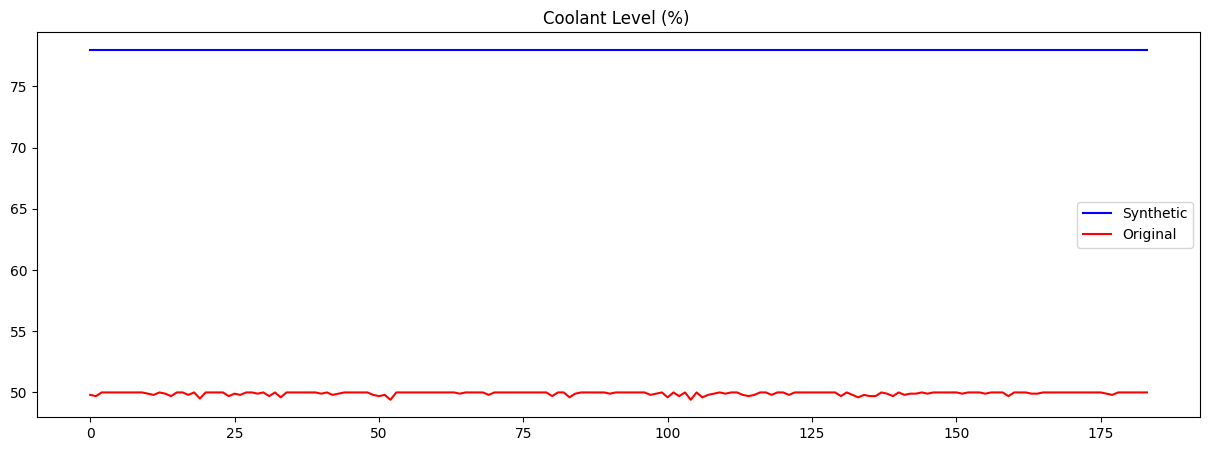

In [9]:
w=500
plt.figure(figsize=(15,5))
v1 = dsets[4]['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
v2 = og['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
plt.title('Fan Speed (rpm) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Original')
plt.legend()
plt.figure(figsize=(15,5))
v1 = dsets[4]['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
v2 = og['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
plt.title('Coolant Temperature (Celsius) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Original')
plt.legend()
plt.figure(figsize=(15,5))
v1 = dsets[4]['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
v2 = og['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(og)/w))]]/w
plt.title('Coolant Level (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Original')
plt.legend()

In [10]:
og.describe()

,Unnamed: 0,64817-1598,65263-111,65262-110
count,92560.000000,92560.000000,92560.000000,92560.000000
mean,46281.500000,4093.787381,49.928155,85.698293
std,26719.914795,95.173993,1.893975,7.293150
min,2.000000,0.000000,0.000000,-40.000000
25%,23141.750000,4096.000000,50.000000,86.000000
50%,46281.500000,4096.000000,50.000000,88.000000
75%,69421.250000,4096.000000,50.000000,90.000000
max,92561.000000,4096.000000,50.000000,94.000000


In [11]:
dsets[3].describe()

,65262-110,65263-111,64817-1598
count,92544.000000,92544.0,92544.000000
mean,89.824933,50.0,4095.026279
std,4.419655,0.0,63.146295
min,69.662320,50.0,0.000000
25%,89.715440,50.0,4096.000000
50%,90.755370,50.0,4096.000000
75%,91.828200,50.0,4096.000000
max,95.459530,50.0,4096.000000


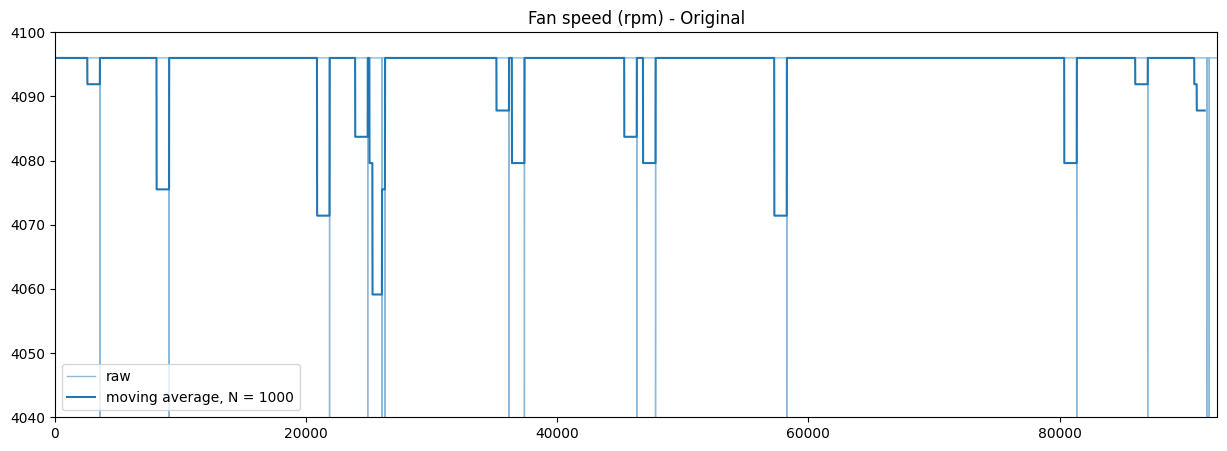

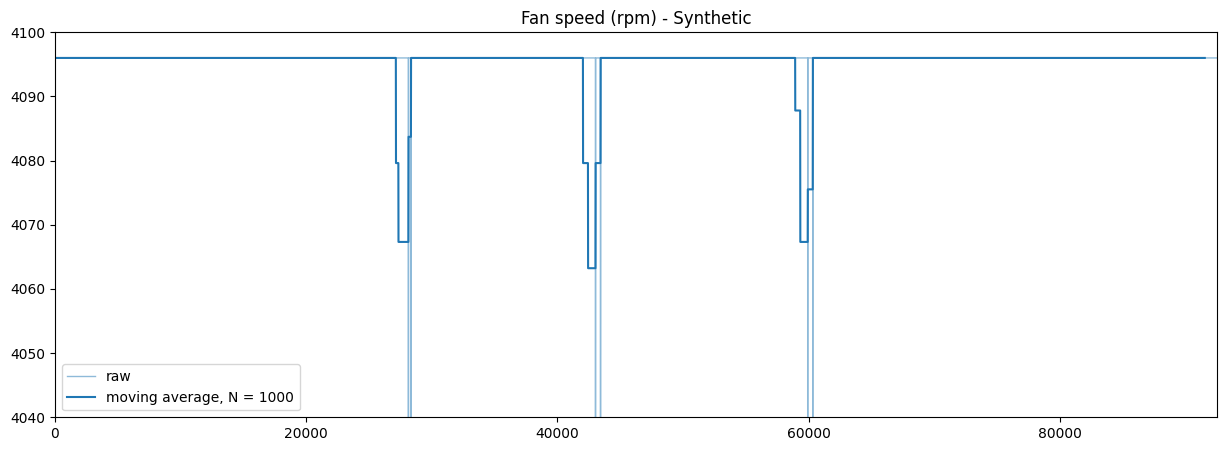

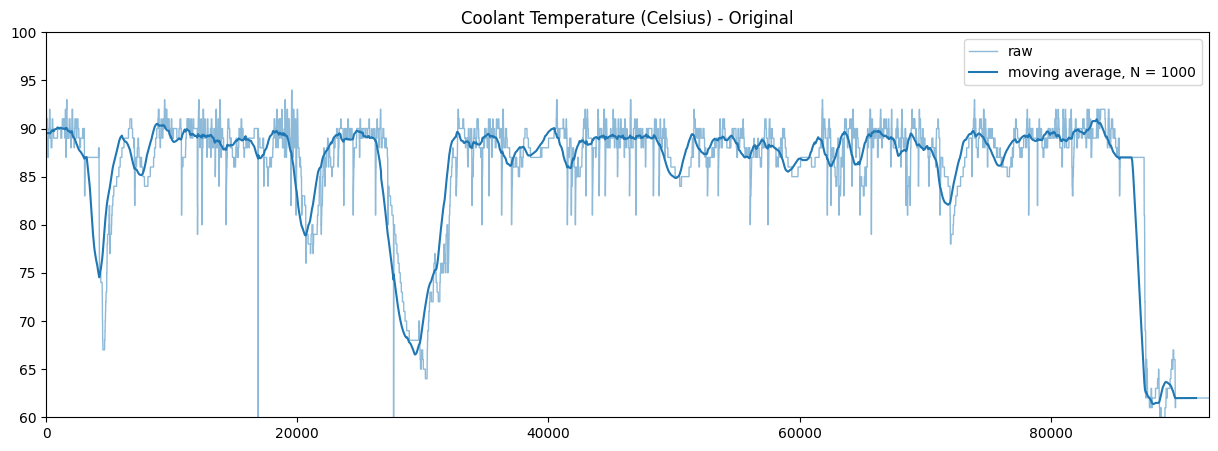

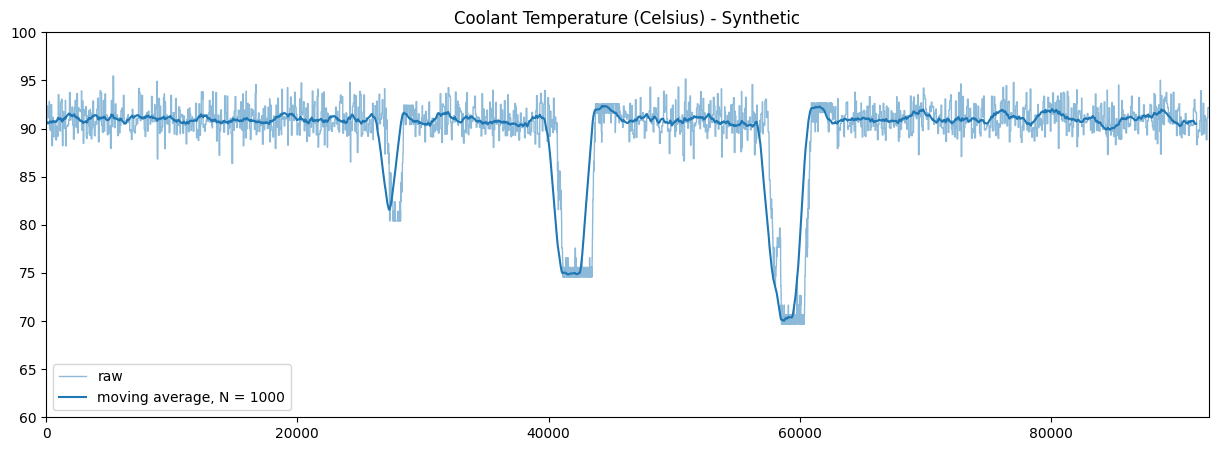

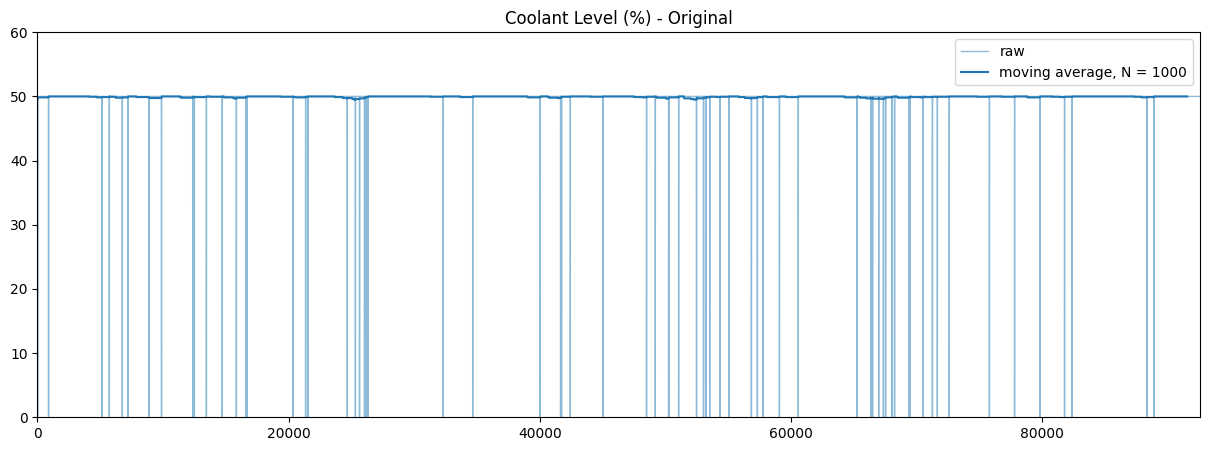

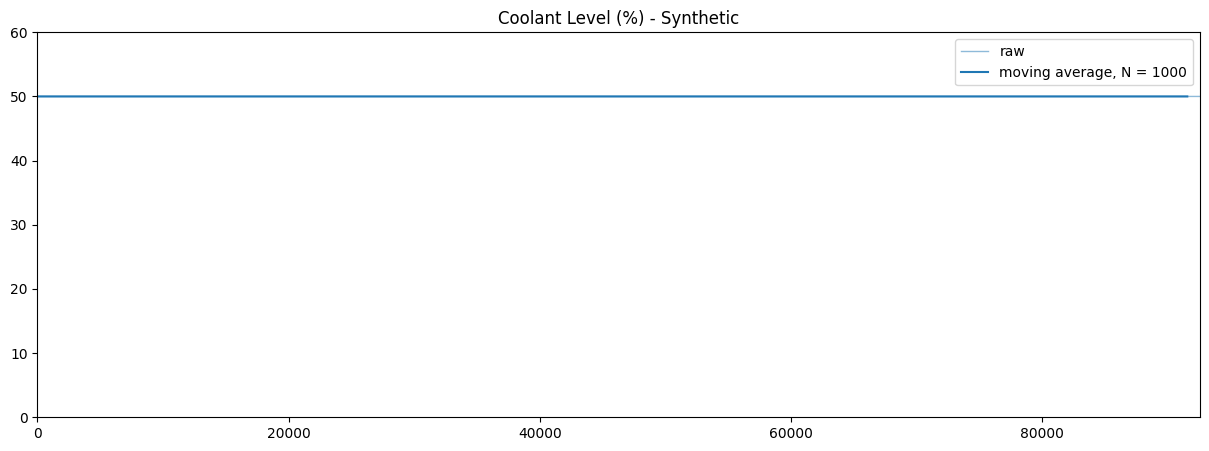

In [12]:
plt.figure(figsize=(15,5))
plt.plot(og['64817-1598'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(og['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Original')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))

plt.plot(dsets[3]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[3]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[3]['64817-1598']))
plt.ylim(4040, 4100)
plt.title('Fan speed (rpm) - Synthetic')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))

plt.plot(og['65262-110'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(og['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Original')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))

plt.plot(dsets[3]['65262-110'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[3]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[3]['65262-110']))
plt.ylim(60, 100)
plt.title('Coolant Temperature (Celsius) - Synthetic')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))

plt.plot(og['65263-111'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(og['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(og['65263-111']))
plt.ylim(0, 60)
plt.title('Coolant Level (%) - Original')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))

plt.plot(dsets[3]['65263-111'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[3]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[3]['65263-111']))
plt.ylim(0, 60)
plt.title('Coolant Level (%) - Synthetic')
plt.legend()
plt.show()

Below is the first type of fault introduced

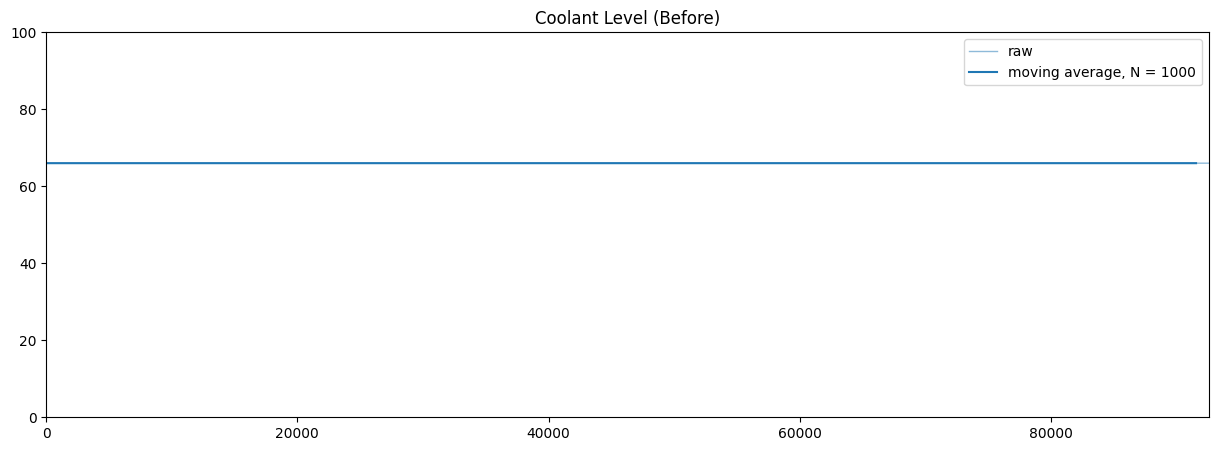

In [13]:
#Plotting the Coolant Level without faults
plt.figure(figsize=(15,5))

plt.plot(dsets[1]['65263-111'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[1]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[1]['65263-111']))
plt.ylim(0,100)
plt.title('Coolant Level (Before)')
plt.legend()
plt.show()

In [14]:
#Picking Dataset dsets[0] and f2
'''The first fault involves lowering the coolant level by 15% or so to indicate a potential leakage in the cooling system'''
valadd = 0.15/len(dsets[0])
val = 0
for index, row in dsets[0].iterrows():
    val += row[1] * valadd
    if(row[1] - val >= 30):
        dsets[0].loc[index, '65263-111'] -= val
valadd = 0.10/len(dsets[1])
val = 0
for index, row in dsets[1].iterrows():
    val += row[1] * valadd
    if(row[1] - val >= 30):
        dsets[1].loc[index, '65263-111'] -= val
dsets[0]['65263-111'] = dsets[0]['65263-111'].round().astype(int)
dsets[1]['65263-111'] = dsets[1]['65263-111'].round().astype(int)

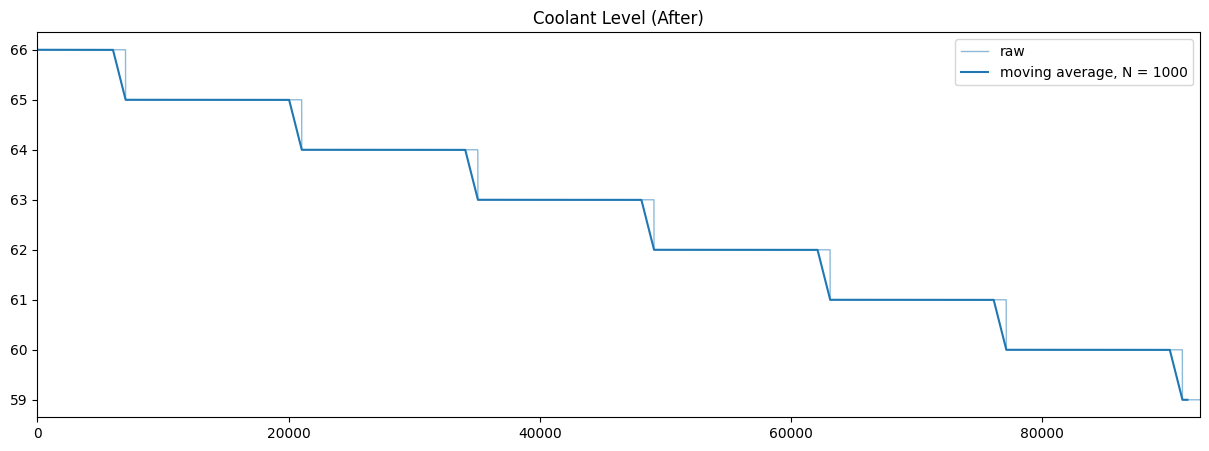

In [15]:
#Plotting the Coolant Level with faults
plt.figure(figsize=(15,5))

plt.plot(dsets[1]['65263-111'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[1]['65263-111'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[1]['65263-111']))
plt.title('Coolant Level (After)')
plt.legend()
plt.show()

Below is the second type of fault

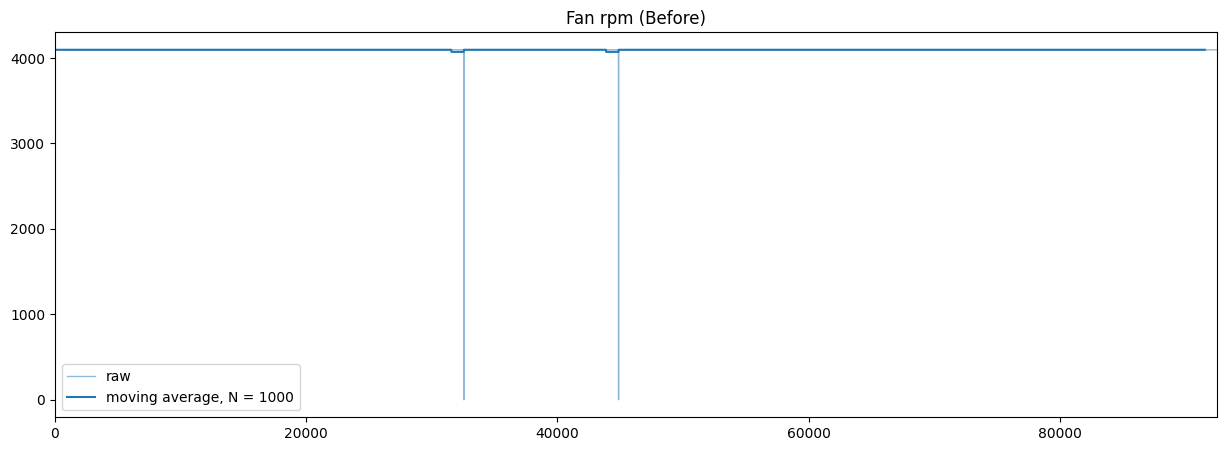

In [16]:
plt.figure(figsize=(15,5))

plt.plot(dsets[2]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[2]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['64817-1598']))
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

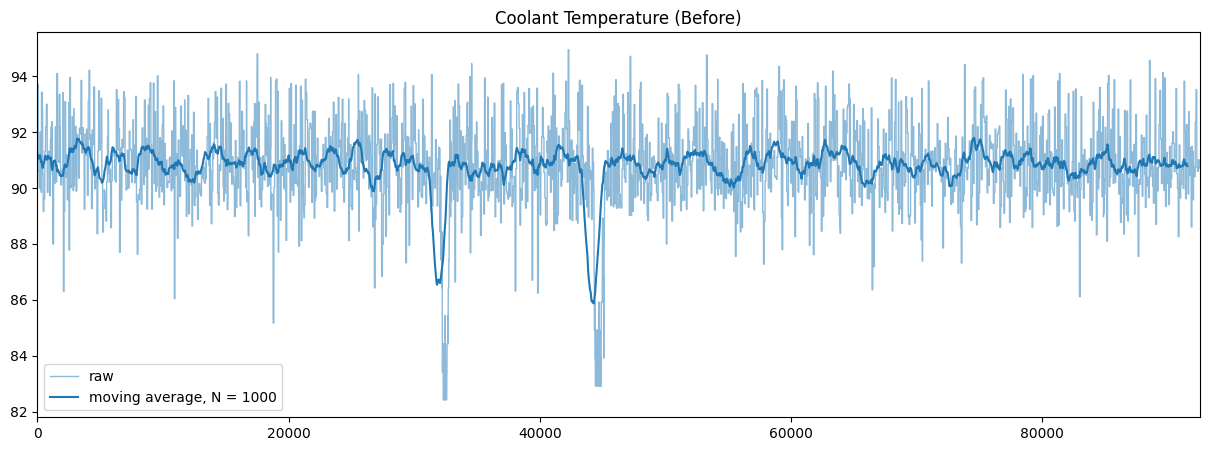

In [17]:
plt.figure(figsize=(15,5))

plt.plot(dsets[2]['65262-110'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[2]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [18]:
#Picking Dataset f3 and f4
'''The second fault involves lowering the fan rpm by 30% or so and increasing the coolant temperature slightly to indicate a fan deterioration'''
valadd = 0.05/len(dsets[2])
val = 0
for index, row in dsets[2].iterrows():
    val += row[0] * valadd
    dsets[2].loc[index, '64817-1598'] -= row[2] * 0.30
    dsets[2].loc[index, '65262-110'] += val
valadd = 0.07/len(dsets[3])
val = 0
for index, row in dsets[3].iterrows():
    val += row[0] * valadd
    dsets[3].loc[index, '65262-110'] += val
    dsets[3].loc[index, '64817-1598'] -= row[2] * 0.35

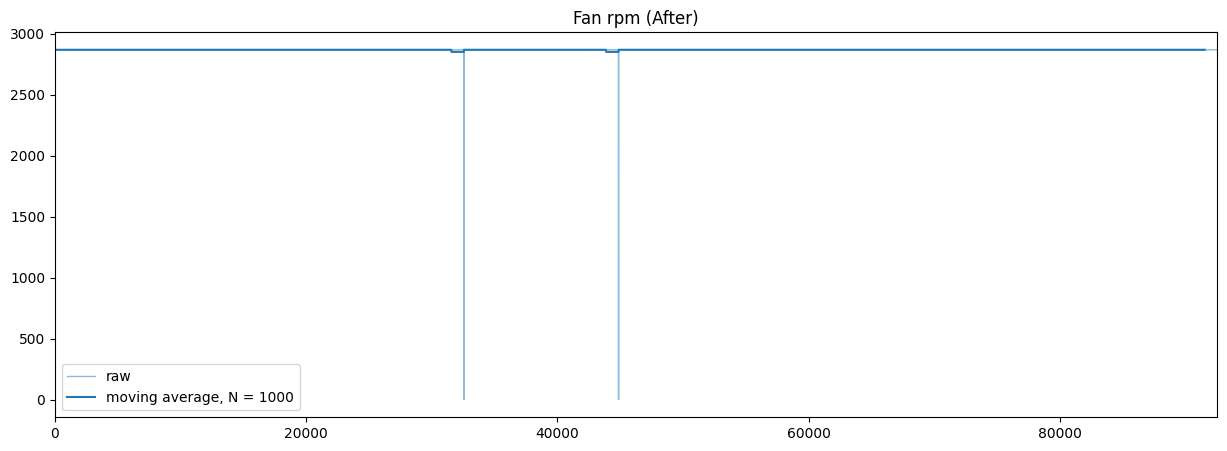

In [19]:
plt.figure(figsize=(15,5))

plt.plot(dsets[2]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[2]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

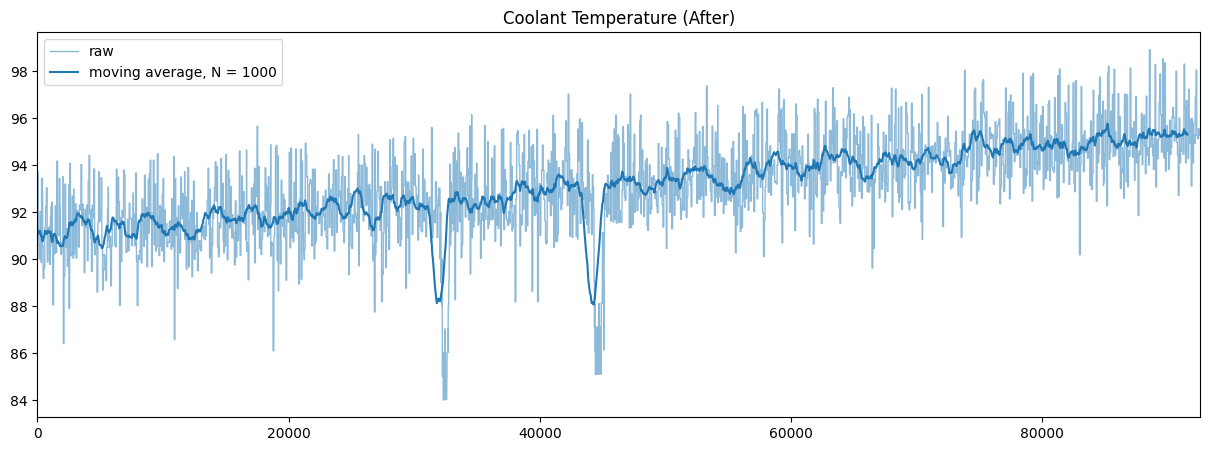

In [20]:
plt.figure(figsize=(15,5))

plt.plot(dsets[2]['65262-110'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[2]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[2]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()

Below is the third fault

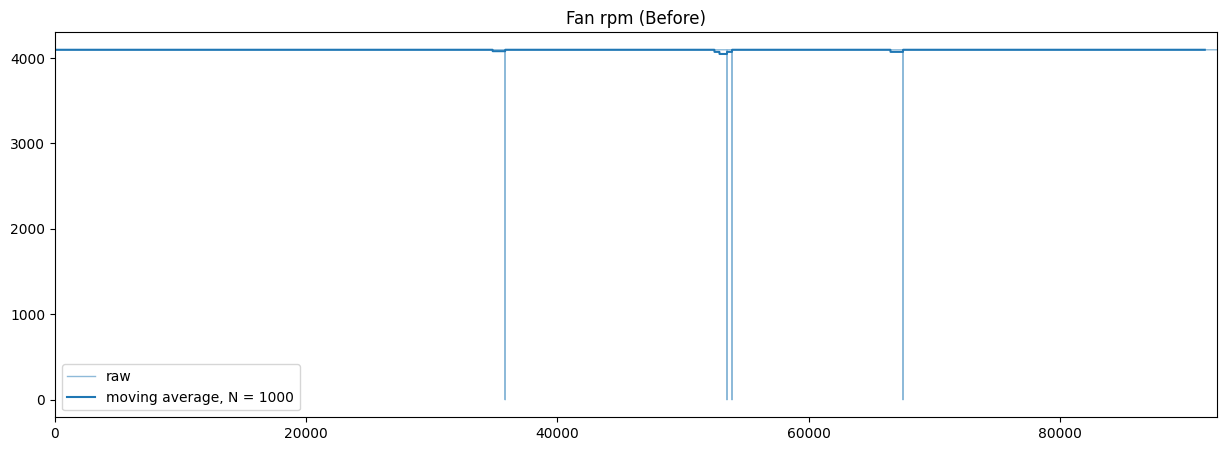

In [21]:
plt.figure(figsize=(15,5))

plt.plot(dsets[4]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[4]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[4]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (Before)')
plt.legend()
plt.show()

In [22]:
#Picking Dataset f5 and f6
'''The second fault involves increasing the fan rpm by 15% or so to indicate a fan deterioration'''
for index, row in dsets[4].iterrows():
    if(row[2]!=0):
        dsets[4].loc[index, '64817-1598'] += row[2] * 0.15
for index, row in dsets[5].iterrows():
    if(row[2]!=0):
        dsets[5].loc[index, '64817-1598'] += row[2] * 0.10

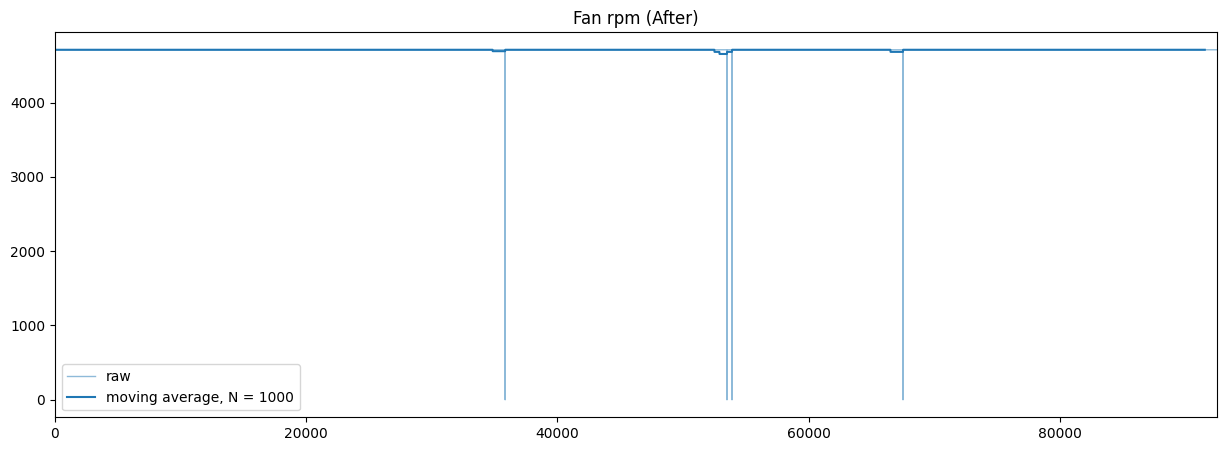

In [23]:
plt.figure(figsize=(15,5))

plt.plot(dsets[4]['64817-1598'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[4]['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[4]['64817-1598']))
#plt.ylim(30, 52)
plt.title('Fan rpm (After)')
plt.legend()
plt.show()

Below is the fourth type of fault introduced

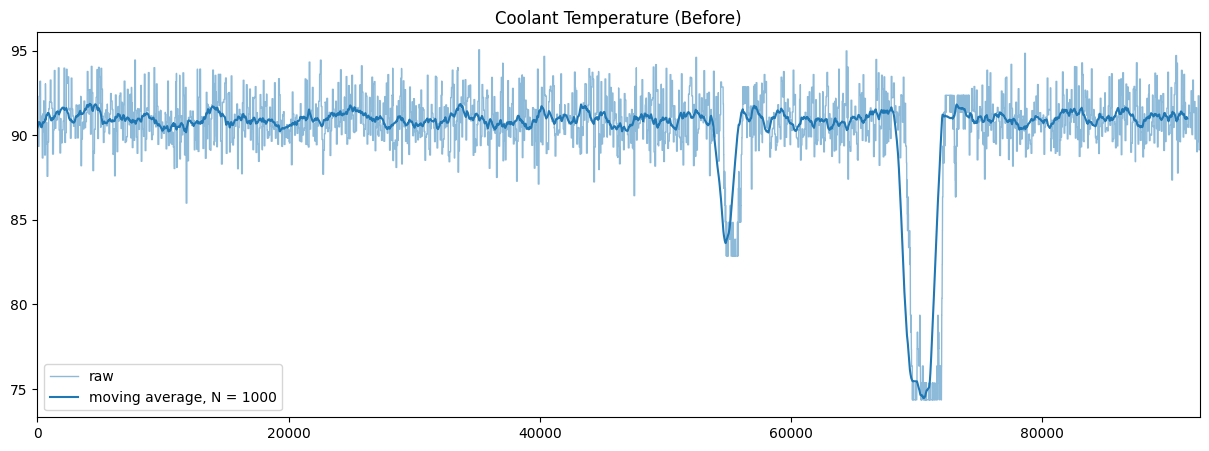

In [24]:
plt.figure(figsize=(15,5))

plt.plot(dsets[6]['65262-110'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[6]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[6]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (Before)')
plt.legend()
plt.show()

In [25]:
#Picking Dataset f7 and f8
'''The fourth fault involves increasing the coolant temperature by 15% or so to indicate a cooling system issue'''
valadd = 0.15/len(dsets[6])
val = 0
for index, row in dsets[6].iterrows():
    val += row[0] * valadd
    dsets[6].loc[index, '65262-110'] += val
valadd = 0.10/len(dsets[7])
val = 0
for index, row in dsets[7].iterrows():
    val += row[0] * valadd
    dsets[7].loc[index, '65262-110'] += val

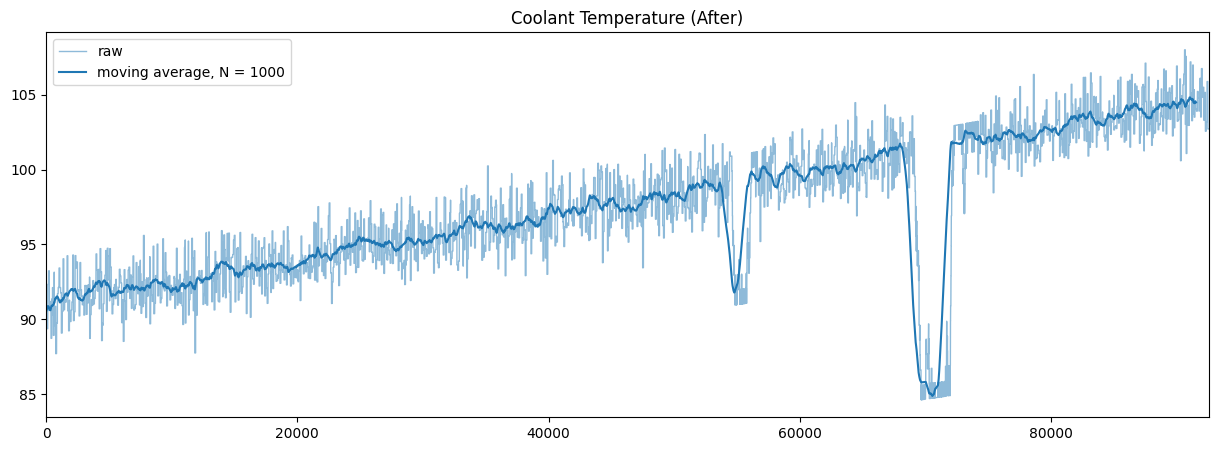

In [26]:
plt.figure(figsize=(15,5))

plt.plot(dsets[6]['65262-110'], linewidth = 1, alpha = 0.5, label = 'raw')
plt.plot(moving_avg(dsets[6]['65262-110'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(dsets[6]['65262-110']))
#plt.ylim(30, 52)
plt.title('Coolant Temperature (After)')
plt.legend()
plt.show()

In [27]:
'''
for i in range(len(dsets)):         #Creating a list of all the datasets
    dsets[i].to_csv(path+'\\faulty_cooling_dset_'+str(i)+'.csv')
'''

"\nfor i in range(len(dsets)):         #Creating a list of all the datasets\n    dsets[i].to_csv(path+'\\faulty_cooling_dset_'+str(i)+'.csv')\n"